In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-13.966178630730653 -1.1673444004719897
-17.348666688844617 70.55036363933223
48.95141995283336 -169.88094011457576
41.57069389156143 -114.36483782105867
-10.315039102135742 -168.99442675899272
71.5141027137661 -127.04955139768026
-24.697331139337052 93.9902527421163
-81.19128693495672 99.20697699180408
-43.79081570788424 -122.80018663598008
73.495069577474 87.49272544439873
87.71216597019227 129.6673748211358
61.03382682048593 84.37287817491836
-27.852174605352907 -52.31460660564295
68.89780246240514 -82.19386841102134
5.469789304857031 -87.00451811489881
82.74615653444991 -162.30841878024052
4.50264374436226 150.3156357322797
20.934169581132736 -12.49689085751956
-36.05830282179193 -19.14576201553706
-70.25886430482225 61.692720971493856
-78.07230810089133 76.46686238798719
-1.2509108223468814 -114.9712478307102
-60.24629964851352 35.5904198546489
66.7044334035192 169.64693281149727
-4.769994694812539 173.8969879658249
-2.324383960558606 8.315944535786429
-0.8614758574568668 -51.2871

-21.700994023374562 170.86933284826836
60.08542252801618 -110.8821657563243
-0.08521501823095434 -89.34892333359707
55.36607119968684 -128.74717774572377
10.587032775490158 -158.1803244821899
-41.071253960729265 111.07384353278172
-33.482707087675756 -74.03943721026806
-70.27478947426602 18.685131738904886
-79.2501332944941 -11.249237336707125
-72.7559756898242 37.59698482168861
21.807371526827453 -30.09043240544534
51.00851968490005 138.10222673259238
-78.8092393736491 90.40686010321207
-11.37532975611012 -69.54428308796675
-35.711073567150386 -123.72975164100794
63.40040506420894 -103.81178338828892
-86.67863459368073 -64.29530765236777
61.40491008783448 -41.45813528057241
62.082066073540574 -37.156593272833504
-47.316632236502855 -66.80329176661854
75.6977967698949 16.101562641079653
-49.834475014489236 134.68899542324334
75.53411602240521 -137.41705042842528
-36.53279181876346 131.57280867263376
-9.488986303685678 130.69178430274854
-59.68785038041784 43.93432971980047
-31.28643076

In [23]:
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [25]:
# Import the requests library.
import requests

import os
from dotenv import load_dotenv
load_dotenv()
OpenWeather_API_KEY = os.getenv("OpenWeather_API_KEY")

In [26]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY
print(type(url))

<class 'str'>


In [27]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | west wendover
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | belyy yar
Processing Record 13 of Set 1 | getulio vargas
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | parrita
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | atar
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set 1 | peve

Processing Record 43 of Set 4 | muravlenko
Processing Record 44 of Set 4 | bato
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | kandrian
Processing Record 47 of Set 4 | henties bay
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | flinders
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | kokoda
Processing Record 3 of Set 5 | belozerskoye
Processing Record 4 of Set 5 | ankpa
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | san lorenzo
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | ballina
Processing Record 9 of Set 5 | karratha
Processing Record 10 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 11 of Set 5 | bowen
Processing Record 12 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 5 | nikolskoye
Processing Record 14 of Set 5 | hue
Processing

Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | kodinar
Processing Record 36 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 37 of Set 8 | banjar
Processing Record 38 of Set 8 | taonan
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | northam
Processing Record 42 of Set 8 | guaruja
Processing Record 43 of Set 8 | angra
City not found. Skipping...
Processing Record 44 of Set 8 | kahului
Processing Record 45 of Set 8 | samarkand
Processing Record 46 of Set 8 | rantepao
Processing Record 47 of Set 8 | vavoua
Processing Record 48 of Set 8 | trelew
Processing Record 49 of Set 8 | faranah
Processing Record 50 of Set 8 | bull savanna
Processing Record 1 of Set 9 | rocha
Processing Record 2 of Set 9 | nortelandia
Processing Record 3 of Set 9 | abu dhabi
Processing Record 4 of Set 9 | revda
Processing Record 5 of Set 9 | mpraeso
Processing Record 6 of Set 9 |

Processing Record 21 of Set 12 | tacna
Processing Record 22 of Set 12 | urengoy
Processing Record 23 of Set 12 | grimshaw
Processing Record 24 of Set 12 | derzhavinsk
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 27 of Set 12 | bognor regis
Processing Record 28 of Set 12 | mangrol
Processing Record 29 of Set 12 | arys
Processing Record 30 of Set 12 | inta
Processing Record 31 of Set 12 | galveston
Processing Record 32 of Set 12 | pathein
Processing Record 33 of Set 12 | rocky mountain house
Processing Record 34 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 35 of Set 12 | seguela
Processing Record 36 of Set 12 | kulhudhuffushi
Processing Record 37 of Set 12 | laramie
Processing Record 38 of Set 12 | tarakan
Processing Record 39 of Set 12 | bahawalpur
Processing Record 40 of Set 12 | tabas
Processing Record 41 of Set 12 | sweetwater
Processing Record 42 of Set 12 | j

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,77.02,78,100,14.97,US,2022-07-21 15:14:04
1,Quatre Cocos,-20.2078,57.7625,69.10,70,80,20.67,MU,2022-07-21 15:14:04
2,Bethel,41.3712,-73.4140,89.69,71,0,5.75,US,2022-07-21 15:10:05
3,West Wendover,40.7391,-114.0733,81.61,32,0,0.00,US,2022-07-21 15:14:05
4,Norman Wells,65.2820,-126.8329,61.66,73,97,4.27,CA,2022-07-21 15:14:06
5,Carnarvon,-24.8667,113.6333,66.99,64,93,15.39,AU,2022-07-21 15:14:06
6,Albany,42.6001,-73.9662,88.63,64,5,1.01,US,2022-07-21 15:11:07
7,Rikitea,-23.1203,-134.9692,74.17,73,4,9.93,PF,2022-07-21 15:14:07
8,Talnakh,69.4865,88.3972,58.21,72,18,8.68,RU,2022-07-21 15:14:07
9,Tiksi,71.6872,128.8694,40.53,84,17,8.43,RU,2022-07-21 15:14:08


In [36]:
city_data_org = ["City", "Country", "Date","Lat","Lng",
                             "Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_org_df = city_data_df[city_data_org]
city_data_org_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-21 15:14:04,42.0970,-79.2353,77.02,78,100,14.97
1,Quatre Cocos,MU,2022-07-21 15:14:04,-20.2078,57.7625,69.10,70,80,20.67
2,Bethel,US,2022-07-21 15:10:05,41.3712,-73.4140,89.69,71,0,5.75
3,West Wendover,US,2022-07-21 15:14:05,40.7391,-114.0733,81.61,32,0,0.00
4,Norman Wells,CA,2022-07-21 15:14:06,65.2820,-126.8329,61.66,73,97,4.27
5,Carnarvon,AU,2022-07-21 15:14:06,-24.8667,113.6333,66.99,64,93,15.39
6,Albany,US,2022-07-21 15:11:07,42.6001,-73.9662,88.63,64,5,1.01
7,Rikitea,PF,2022-07-21 15:14:07,-23.1203,-134.9692,74.17,73,4,9.93
8,Talnakh,RU,2022-07-21 15:14:07,69.4865,88.3972,58.21,72,18,8.68
9,Tiksi,RU,2022-07-21 15:14:08,71.6872,128.8694,40.53,84,17,8.43


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_org_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

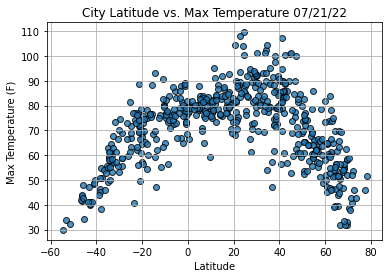

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

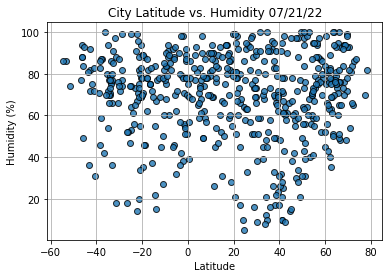

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

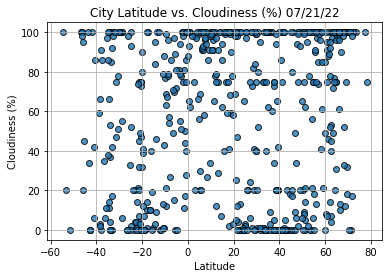

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

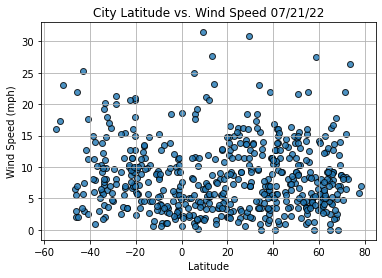

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                      Parrita
Lat                        9.5201
Lng                      -84.3225
Max Temp                     79.7
Humidity                       81
Cloudiness                    100
Wind Speed                   1.74
Country                        CR
Date          2022-07-21 15:14:10
Name: 13, dtype: object

In [47]:
 city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
546     True
547     True
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,77.02,78,100,14.97,US,2022-07-21 15:14:04
2,Bethel,41.3712,-73.4140,89.69,71,0,5.75,US,2022-07-21 15:10:05
3,West Wendover,40.7391,-114.0733,81.61,32,0,0.00,US,2022-07-21 15:14:05
4,Norman Wells,65.2820,-126.8329,61.66,73,97,4.27,CA,2022-07-21 15:14:06
6,Albany,42.6001,-73.9662,88.63,64,5,1.01,US,2022-07-21 15:11:07
...,...,...,...,...,...,...,...,...,...
546,Bahawalpur,29.4000,71.6833,82.18,77,84,30.78,PK,2022-07-21 15:29:10
547,Tabas,33.5959,56.9244,100.99,8,0,9.73,IR,2022-07-21 15:29:11
548,Sweetwater,25.7634,-80.3731,92.01,63,20,9.22,US,2022-07-21 15:29:11
549,Jalu,29.0331,21.5482,94.08,16,0,15.97,LY,2022-07-21 15:29:12


In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,77.02,78,100,14.97,US,2022-07-21 15:14:04
2,Bethel,41.3712,-73.4140,89.69,71,0,5.75,US,2022-07-21 15:10:05
3,West Wendover,40.7391,-114.0733,81.61,32,0,0.00,US,2022-07-21 15:14:05
4,Norman Wells,65.2820,-126.8329,61.66,73,97,4.27,CA,2022-07-21 15:14:06
6,Albany,42.6001,-73.9662,88.63,64,5,1.01,US,2022-07-21 15:11:07


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

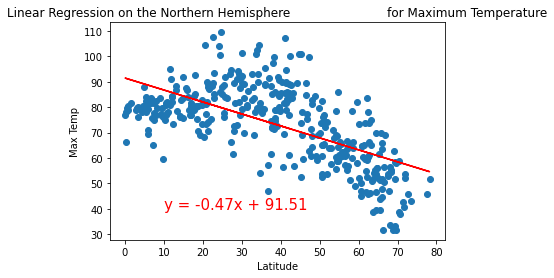

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

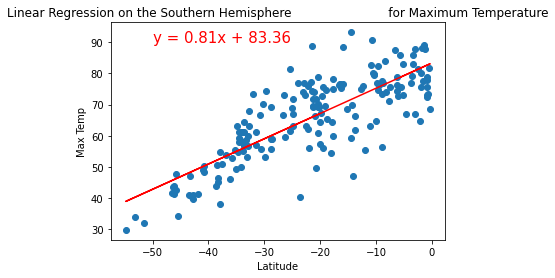

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

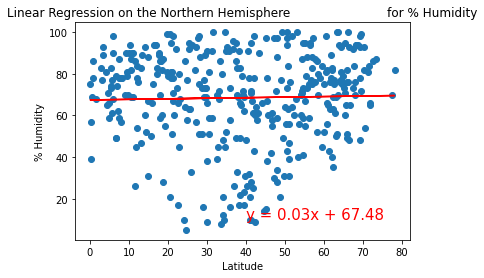

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

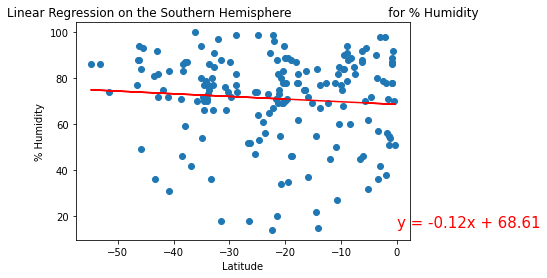

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(0,15))

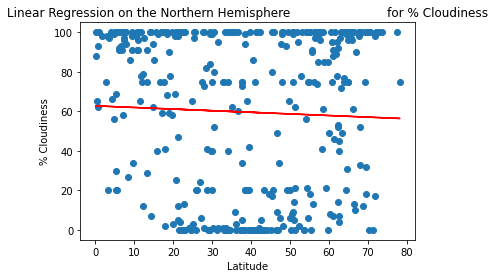

In [60]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

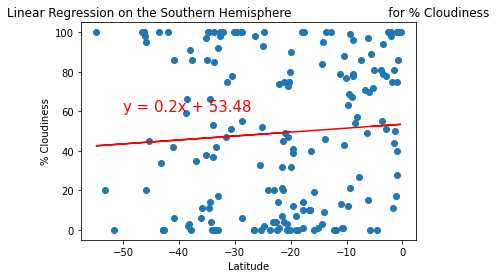

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

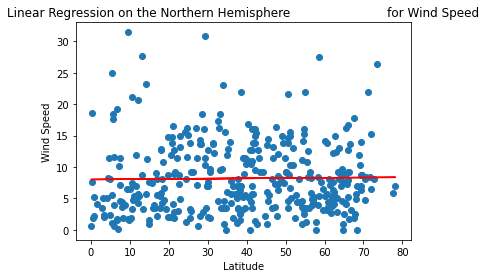

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

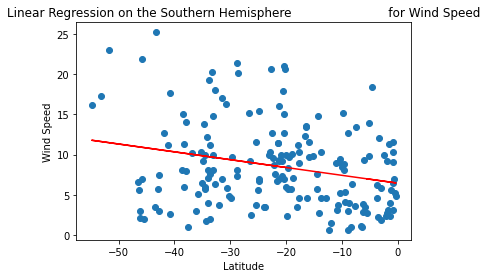

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))